<a href="https://colab.research.google.com/github/CMOONCS/NLP-Gender-Bias/blob/main/Word2VecModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec model 
<b>Model training a on large dataset</b><br>
<i> Note: To make and save the changes to the colab notebook go to 'File -> Save a copy in Drive' </i>


<b>Install (if needed) and import libraries 

In [ ]:
!pip install spacy
!python -m spacy download en
!pip install bs4
#!pip install lxml
!pip install nltk
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 12.0 MB 3.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 1. Import all nesessary libraries

In [ ]:
import re, string 
import pandas as pd 
from time import time  
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
from bs4 import BeautifulSoup
import re, string
%matplotlib inline

### 2. Load and look at the data from a file containing raw text of BBC news (news category: business, entertainment, politics, sport, and tech.)
This is BBC news <a href = "https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv"> data</a> from an online <a href ="https://github.com/suraj-deshmukh/BBC-Dataset-News-Classificationc"> source</a>.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv'
df1 = pd.read_csv(url,encoding = "ISO-8859-1")
#df1 =df1['news']
df1

,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business
...,...,...
2220,Microsoft launches its own search\n \n Microso...,tech
2221,Warnings about junk mail deluge\n \n The amoun...,tech
2222,Microsoft gets the blogging bug\n \n Software ...,tech
2223,Gamers snap up new Sony PSP\n \n Gamers have b...,tech


### 3. Preparing the data (cleaning text)

In [ ]:
clean = []
for doc in df1['news']:
    t = doc.lower() # lower case
    t = BeautifulSoup(t,'html.parser').text #remove tags
    t = re.sub('[^A-Za-z0-9]+',' ',t)# remove special characters/symbols 
    clean.append(t)
df1['clean']= clean    


<b>--> Look at the text after cleaning(preprocessing)

In [ ]:
df1.head()

,news,type,clean
0,China had role in Yukos split-up\n \n China le...,business,china had role in yukos split up china lent ru...
1,Oil rebounds from weather effect\n \n Oil pric...,business,oil rebounds from weather effect oil prices re...
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business,indonesia declines debt freeze indonesia no lo...
3,$1m payoff for former Shell boss\n \n Shell is...,business,1m payoff for former shell boss shell is to p...
4,US bank in $515m SEC settlement\n \n Five Bank...,business,us bank in 515m sec settlement five bank of am...


<b>--> The training sample size (how many words present in the vocabulary?)

In [ ]:
sentences = [row.split() for row in df1['clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1

print('Documents:',len(sentences))
print('Words:',len(word_freq))

Documents: 2225
Words: 29454


<b>--> What are the highly frequent words?

In [ ]:
sorted(word_freq, key=word_freq.get, reverse= True)[:10]


['the', 'to', 'of', 'and', 'a', 'in', 's', 'for', 'is', 'that']

### 4. Define Word2Vec model

In [ ]:
w2v_model = Word2Vec(min_count=1,
                     window=5,
                     size=100,
                     workers=1, seed = 1)

### 5. Build a vocabulary

In [ ]:
w2v_model.build_vocab(sentences)

<b>-->Check vocabulary

In [ ]:
wordlist = list(w2v_model.wv.vocab)
print(wordlist[5:20])# 15 words from the vocabulary
#print(wordlist)# The whole list of vocabulary

['split', 'up', 'lent', 'russia', '6bn', '3', '2bn', 'to', 'help', 'the', 'russian', 'government', 'renationalise', 'key', 'yuganskneftegas']


### 6. Train the model

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
# As we do not plan to train the model any further, 
# We are calling init_sims(), to make it Memory-efficient
w2v_model.init_sims(replace=True)

### 7. Explore the model

<b>--> Most similar words for a given word

In [ ]:
# Explore the model
w = 'internet' # example word = 'internet'
w2v_model.wv.most_similar(positive=[w])

[('networks', 0.9593844413757324),
 ('net', 0.958107590675354),
 ('products', 0.950501024723053),
 ('pcs', 0.9460382461547852),
 ('businesses', 0.9399034976959229),
 ('security', 0.9386725425720215),
 ('spread', 0.9372159242630005),
 ('files', 0.9359675645828247),
 ('computer', 0.9352279901504517),
 ('computers', 0.935116171836853)]

<b>--> Top 5 similar words

In [ ]:
w = 'china' # example word 'russia'
w2v_model.wv.most_similar(positive=[w],topn =5)

[('india', 0.974982500076294),
 ('nintendo', 0.958051323890686),
 ('japan', 0.9534661769866943),
 ('stock', 0.9494514465332031),
 ('america', 0.9463974237442017)]

<b>--> Similarity between two words

In [ ]:
u = 'man'; v = 'woman' #other example words 'sea' and 'water'
w2v_model.wv.similarity(u,v)

0.9161313

In [ ]:
u = 'water'; v = 'sea' 
w2v_model.wv.similarity(u,v)

0.9380232

Not so close words

In [ ]:
u = 'highly'; v = 'sunday' #other not so close meaning words 
w2v_model.wv.similarity(u,v)

0.5895961

<b>--> Analogy (from the triplet),<br> E.g., go: went :: come: ? ;  Answer: came

---



In [ ]:
def analogy(a,b,c):
  ans = w2v_model.wv.most_similar(negative=[a],positive=[b,c],topn =1) # E.g., rain+fly-raining =flying
  print ('Answer: ', ans[0][0])
  


In [ ]:
analogy('he','she','his')

Answer:  her


In [ ]:
analogy('go','went','come')

Answer:  came


In [ ]:
analogy('days','month','months')

Answer:  year


In [ ]:
analogy('man','woman', 'king')

Answer:  twins


<b>--> Plot embeddings</b><br>
  Consider some common terms in the vocabulary as given in the following example 

In [ ]:
# We create 65 informative terms that compose our model vocabulary (to see how they are embedded in the vector space) 
informative_terms = ("bad", "great", "best", "worst", "fun", "beautiful",
                     "excellent", "poor", "boring", "awful", "terrible",
                     "definitely", "perfect", "liked", "worse", "waste",
                      "loved", "unfortunately", "amazing",
                     "enjoyed", "favourite", "horrible", "brilliant", "highly",
                     "sunday","monday","friday","computer", "software","network",
                     "business", "bank", "money",
                     "simple", "annoying", "today", "hilarious", "enjoyable",
                     "dull", "fantastic", "poorly", "fails", "disappointing",
                     "disappointment", "not", "him", "her", "good", "time",
                       "action","china", "moscow","usa","brazil",
                     "drama", "family", "dialogue","plot","acting", 
                     '1','2','3','100','1bn','3bn')
len(informative_terms)

65

<b>--> Define and call a function to plot (using TSNE tool) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


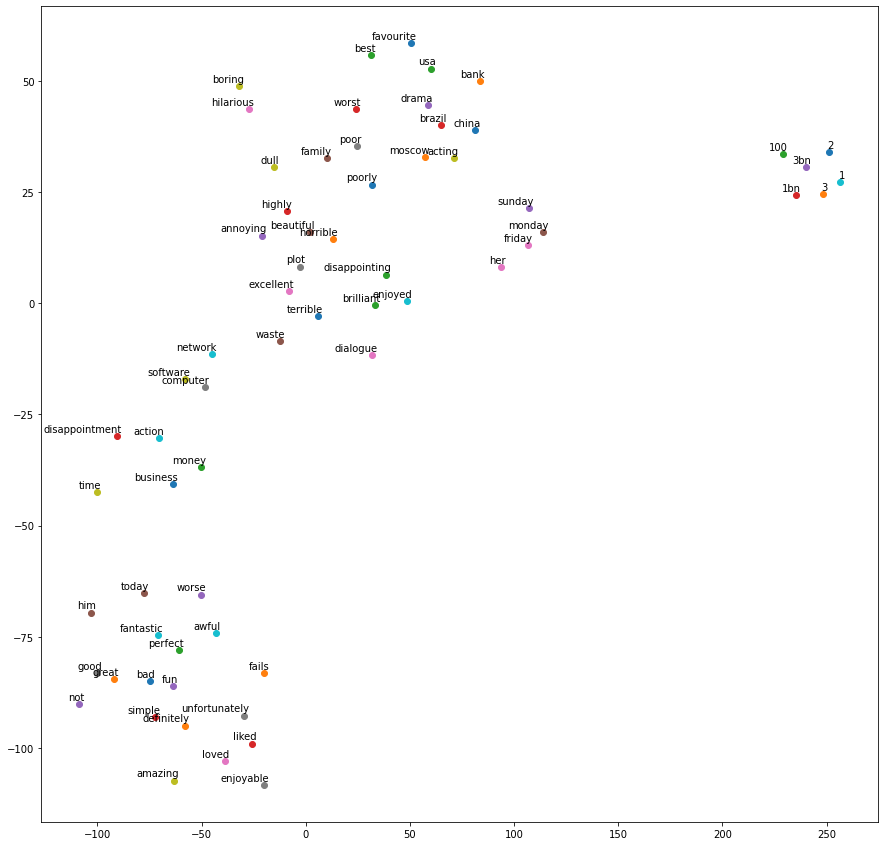

In [ ]:
## define a function to plot 
import matplotlib.pyplot as plt
def tsne_plot(model,words_labels):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in words_labels:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
 ## call this function
tsne_plot(w2v_model,informative_terms)